# Formula 1 Weather Forecasting using ADS and AutomL

# Overview:

In the F1 sports E-game weather plays a vital role in the gameplay of the driver or a garage team. In this notebook we will be performing exploratory data analysis to understand the data, using the weather dataset. The weather dataset has 58 features in which a few of the features will contribute significantly in the prediction of weather. The target variables are continuous and dicrete values representing a quantitative and qualitative measure of weather and it's percentage.

We will start from the data loading, then analysis of Data, after analysis we will transform the features and then apply the AutoML model. Finally, We will evaluate how well the model generalizes to the problem. 

---


# Contents:
- <a>Data Loading</a>
- <a>Exploratory Data Analysis</a>
    - <a>Getting overall statistics</a>
    - <a>Column based EDA</a>
    - <a>ADS DatasetFactory</a>
    - <a>Imputation Actions</a>
    - <a>Normalizing Values</a>
    - <a>Correlation evaluation with Target Variable</a>
    - <a>Imputation Actions</a>
- <a>AutoML Model</a>
    - <a>Visualization and Evaluation</a> 
    - <a>Import model to pickle</a>


# Data Loading

In [1]:
# Load a number of libraries, including the Accelerated Data Science DatasetFactory and initialize it.
# importig the libraries
import pandas as pd
import logging
import numpy as np
import ads
import oci
from oci.data_science import DataScienceClient
from ads.dataset.factory import DatasetFactory

# OCI ADS API
ads.set_auth(auth='resource_principal')
resource_principal = oci.auth.signers.get_resource_principals_signer()
dsc = DataScienceClient(config={},signer=resource_principal)

In [2]:
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)
weather_data = pd.read_csv('weather.csv')

# Exploratory Data Analysis
The intial investigation performed on data with the aim to get insights , patterns and to detect anamolies in a data is called EDA - Exploratory Data Analysis


High level Exploratory Data Analysis (getting overall statistics of the data)

In [3]:
# Checking the head(first five rows) of weather_data
weather_data.head()

,M_PACKET_FORMAT,M_GAME_MAJOR_VERSION,M_GAME_MINOR_VERSION,M_PACKET_VERSION,M_PACKET_ID,M_SESSION_UID,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_PLAYER_CAR_INDEX,M_SECONDARY_PLAYER_CAR_INDEX,...,M_AI_DIFFICULTY,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_IS_SPECTATING,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES,Unnamed: 58
0,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,...,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
1,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,...,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
2,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,...,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
3,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,...,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
4,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,...,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN


In [4]:
# Let's check the number of rows and columns in dataframe
weather_data.shape

(3572328, 59)

In [5]:
# Let's see the stats of our dataframe
weather_data.describe()

,M_PACKET_FORMAT,M_GAME_MAJOR_VERSION,M_GAME_MINOR_VERSION,M_PACKET_VERSION,M_PACKET_ID,M_SESSION_UID,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_PLAYER_CAR_INDEX,M_SECONDARY_PLAYER_CAR_INDEX,...,M_AI_DIFFICULTY,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_IS_SPECTATING,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES,Unnamed: 58
count,3572328.0,3572328.0,3.572328e+06,3572328.0,3572328.0,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3572328.0,...,3.572328e+06,3.572328e+06,3.572327e+06,3.572327e+06,3.572327e+06,3.572327e+06,3.572327e+06,3.572327e+06,3.572327e+06,0.0
mean,2021.0,1.0,1.410704e+01,1.0,1.0,8.239394e+18,1.019926e+03,2.857427e+04,9.212292e+00,255.0,...,4.595344e+01,7.583221e+01,2.261691e-01,1.709807e+02,1.580382e-01,1.487266e-03,6.307732e-01,3.153866e-01,1.687091e+01,NaN
std,0.0,0.0,3.091641e-01,0.0,0.0,5.119260e+18,1.682487e+03,5.428773e+04,9.217495e+00,0.0,...,3.811992e+01,8.123138e+00,4.183500e-01,6.422035e+01,3.647768e-01,3.853640e-02,9.293394e-01,4.646697e-01,1.092343e+00,NaN
min,2021.0,1.0,1.400000e+01,1.0,1.0,2.106082e+16,4.000000e-03,0.000000e+00,0.000000e+00,255.0,...,0.000000e+00,6.000000e+01,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,NaN
25%,2021.0,1.0,1.400000e+01,1.0,1.0,3.591802e+18,1.138000e+02,3.007000e+03,0.000000e+00,255.0,...,3.100000e+01,8.000000e+01,0.000000e+00,2.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01,NaN
50%,2021.0,1.0,1.400000e+01,1.0,1.0,7.802116e+18,4.319240e+02,1.174900e+04,2.000000e+00,255.0,...,3.100000e+01,8.000000e+01,0.000000e+00,2.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,NaN
75%,2021.0,1.0,1.400000e+01,1.0,1.0,1.279207e+19,1.024212e+03,2.972400e+04,1.900000e+01,255.0,...,9.000000e+01,8.000000e+01,0.000000e+00,2.000000e+02,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,1.800000e+01,NaN
max,2021.0,1.0,1.500000e+01,1.0,1.0,1.826297e+19,9.686959e+03,3.339170e+05,1.900000e+01,255.0,...,1.100000e+02,8.000000e+01,1.000000e+00,2.000000e+02,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.900000e+01,NaN


In [6]:
# Information about the columns
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3572328 entries, 0 to 3572327
Data columns (total 59 columns):
 #   Column                                          Dtype  
---  ------                                          -----  
 0   M_PACKET_FORMAT                                 int64  
 1   M_GAME_MAJOR_VERSION                            int64  
 2   M_GAME_MINOR_VERSION                            int64  
 3   M_PACKET_VERSION                                int64  
 4   M_PACKET_ID                                     int64  
 5   M_SESSION_UID                                   float64
 6   M_SESSION_TIME                                  float64
 7   M_FRAME_IDENTIFIER                              int64  
 8   M_PLAYER_CAR_INDEX                              int64  
 9   M_SECONDARY_PLAYER_CAR_INDEX                    int64  
 10  M_BRAKING_ASSIST                                int64  
 11  M_SESSION_LINK_IDENTIFIER                       int64  
 12  M_PIT_RELEASE_ASSIST        

In [7]:
# number of null values in every column
weather_data.isnull().sum()

M_PACKET_FORMAT                                         0
M_GAME_MAJOR_VERSION                                    0
M_GAME_MINOR_VERSION                                    0
M_PACKET_VERSION                                        0
M_PACKET_ID                                             0
M_SESSION_UID                                           0
M_SESSION_TIME                                          0
M_FRAME_IDENTIFIER                                      0
M_PLAYER_CAR_INDEX                                      0
M_SECONDARY_PLAYER_CAR_INDEX                            0
M_BRAKING_ASSIST                                        0
M_SESSION_LINK_IDENTIFIER                               0
M_PIT_RELEASE_ASSIST                                    0
TIMESTAMP                                               0
M_ZONE_START                                      2598054
M_ZONE_FLAG                                       2598054
M_PIT_STOP_WINDOW_IDEAL_LAP                             0
M_TRACK_TEMPER

### Column based EDA 
(Viewing statistics for rest over columns)

In [8]:
# number of unique values in every column
weather_data.nunique()

M_PACKET_FORMAT                                       1
M_GAME_MAJOR_VERSION                                  1
M_GAME_MINOR_VERSION                                  2
M_PACKET_VERSION                                      1
M_PACKET_ID                                           1
M_SESSION_UID                                       153
M_SESSION_TIME                                    44500
M_FRAME_IDENTIFIER                                28603
M_PLAYER_CAR_INDEX                                    8
M_SECONDARY_PLAYER_CAR_INDEX                          1
M_BRAKING_ASSIST                                      3
M_SESSION_LINK_IDENTIFIER                            50
M_PIT_RELEASE_ASSIST                                  2
TIMESTAMP                                         45718
M_ZONE_START                                        192
M_ZONE_FLAG                                           4
M_PIT_STOP_WINDOW_IDEAL_LAP                          12
M_TRACK_TEMPERATURE                             

In [20]:
# drop all those columns, which have only one unique value
weather_data_updated=weather_data
for col in weather_data.columns:
    if len(weather_data[col].unique()) == 1 and weather_data.shape[0]==weather_data[col].shape[0]:
        weather_data_updated = weather_data_updated.drop(col,axis=1)

In [21]:
print("Remaining Columns=",weather_data_updated.shape[1])

Remaining Columns= 51


In [22]:
# Drop those rows where num_weather_forecast_samples=0 and session type is 0
weather_data_updated= weather_data_updated[(weather_data_updated['M_NUM_WEATHER_FORECAST_SAMPLES'] != 0)
                                           & (weather_data_updated['M_SESSION_TYPE'] != 0)]

In [23]:
print("Remaining Rows=",weather_data_updated.shape[0])

Remaining Rows= 2745117


In [24]:
# finding the count of every unique value in weather's column. its gonna be our target varriable
weather_data_updated['M_WEATHER'].value_counts()

0    1880022
1     763609
2     101486
Name: M_WEATHER, dtype: int64

In [25]:
# Correlation of every column with target varriable M_WEATHER
weather_data_updated.corrwith(weather_data_updated["M_WEATHER"])

M_GAME_MINOR_VERSION                                   NaN
M_SESSION_UID                                     0.032278
M_SESSION_TIME                                    0.213398
M_FRAME_IDENTIFIER                                0.235064
M_PLAYER_CAR_INDEX                               -0.528437
M_BRAKING_ASSIST                                  0.129839
M_SESSION_LINK_IDENTIFIER                         0.122606
M_PIT_RELEASE_ASSIST                              0.150312
TIMESTAMP                                        -0.306690
M_ZONE_START                                      0.014273
M_ZONE_FLAG                                       0.062567
M_PIT_STOP_WINDOW_IDEAL_LAP                       0.228704
M_TRACK_TEMPERATURE                              -0.703760
M_TRACK_LENGTH                                    0.461109
M_GAME_PAUSED                                     0.070961
M_FORECAST_ACCURACY                              -0.105276
M_AIR_TEMPERATURE                                -0.6393

### ADS DatasetFactory
Some automated operations that can be performed are

- Dropping constant and ID columns, which has no predictive quality.

- Imputation to fill in missing values in noisy data.

- Dropping strongly co-correlated columns that tend to produce less generalizable models.

- Balancing a dataset using up or down sampling.

<a href='#rowops'>https://docs.oracle.com/en-us/iaas/tools/ads-sdk/latest/user_guide/data_transformation/data_transformation.html</a>

loop1:   0%|          | 0/4 [00:00<?, ?it/s]

loop1:   0%|          | 0/7 [00:00<?, ?it/s]

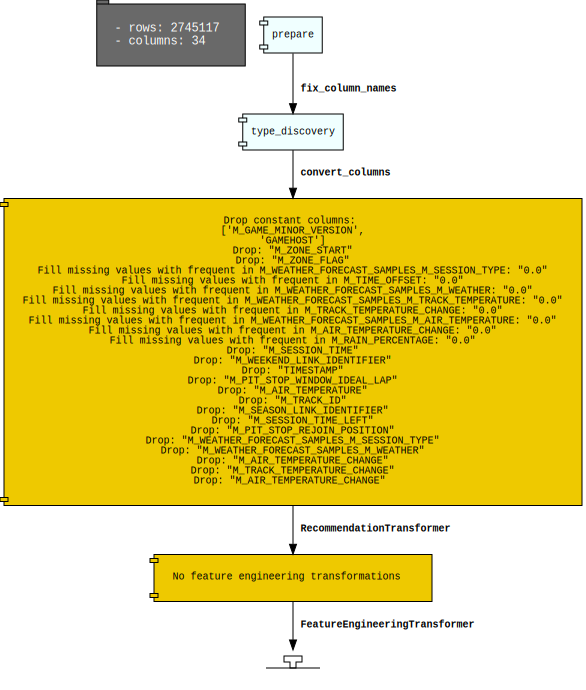

In [26]:
# Taking Suggestions from Dataset Facorty about our data cleaning
dataSetFactorySuggestions = DatasetFactory.open(weather_data_updated, target="M_WEATHER")
suggestedData = dataSetFactorySuggestions.auto_transform()
suggestedData.visualize_transforms()

In [27]:
# dropping suggested columns
weather_data_updated=weather_data_updated.drop(labels=['GAMEHOST','M_GAME_MINOR_VERSION','M_ZONE_START',
                                        'M_ZONE_FLAG','M_SESSION_TIME',
                                        'M_WEEKEND_LINK_IDENTIFIER','TIMESTAMP',
                                        'M_PIT_STOP_WINDOW_IDEAL_LAP','M_AIR_TEMPERATURE',
                                        'M_TRACK_ID','M_SEASON_LINK_IDENTIFIER','M_SESSION_TIME_LEFT',
                                        'M_PIT_STOP_REJOIN_POSITION'], axis=1)

In [28]:
print("Remaining Columns=",weather_data_updated.shape[1])

Remaining Columns= 38


### Imputation Actions

In [29]:
# Fill the null values with suggested technique
columns_list=['M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE','M_TIME_OFFSET','M_WEATHER_FORECAST_SAMPLES_M_WEATHER',
             'M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE','M_TRACK_TEMPERATURE_CHANGE',
              'M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE','M_AIR_TEMPERATURE_CHANGE','M_RAIN_PERCENTAGE']
for col in columns_list:
     weather_data_updated[col].fillna(0.0, inplace = True)

In [30]:
# check the null values in every column
weather_data_updated.isnull().sum()

M_SESSION_UID                                     0
M_FRAME_IDENTIFIER                                0
M_PLAYER_CAR_INDEX                                0
M_BRAKING_ASSIST                                  0
M_SESSION_LINK_IDENTIFIER                         0
M_PIT_RELEASE_ASSIST                              0
M_TRACK_TEMPERATURE                               0
M_TRACK_LENGTH                                    0
M_GAME_PAUSED                                     0
M_FORECAST_ACCURACY                               0
M_NUM_WEATHER_FORECAST_SAMPLES                    0
M_ERSASSIST                                       0
M_FORMULA                                         0
M_PIT_ASSIST                                      0
M_GEARBOX_ASSIST                                  0
M_SESSION_TYPE                                    0
M_SPECTATOR_CAR_INDEX                             0
M_PIT_STOP_WINDOW_LATEST_LAP                      0
M_DYNAMIC_RACING_LINE_TYPE                        0
M_SESSION_DU

In [31]:
# imputing those columns where still nan values exist. Impute with most frquent value
list_of_MoreColumns_to_impute=['M_NETWORK_GAME','M_TOTAL_LAPS','M_STEERING_ASSIST'
                              ,'M_IS_SPECTATING','M_DYNAMIC_RACING_LINE','M_DRSASSIST',
                              'M_NUM_MARSHAL_ZONES']
for col in list_of_MoreColumns_to_impute:
    weather_data_updated[col].fillna(weather_data_updated[col].value_counts().index[0], inplace=True)

### Normalizing Values

In [33]:
from sklearn import preprocessing

dataFram_without_weather=resultantData.loc[:, resultantData.columns!='M_WEATHER']
array_of_data = dataFram_without_weather.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
array_of_data_scaled = min_max_scaler.fit_transform(array_of_data)
Final_data_frame = pd.DataFrame(array_of_data_scaled,columns=dataFram_without_weather.columns)

In [34]:
Final_data_frame=weather_data_updated

### Correlation evaluation with Target Variable

In [35]:
# Correlation of every column with target varriable M_WEATHER
Final_data_frame.corrwith(Final_data_frame["M_WEATHER"])

M_SESSION_UID                                     0.032278
M_FRAME_IDENTIFIER                                0.235064
M_PLAYER_CAR_INDEX                               -0.528437
M_BRAKING_ASSIST                                  0.129839
M_SESSION_LINK_IDENTIFIER                         0.122606
M_PIT_RELEASE_ASSIST                              0.150312
M_TRACK_TEMPERATURE                              -0.703760
M_TRACK_LENGTH                                    0.461109
M_GAME_PAUSED                                     0.070961
M_FORECAST_ACCURACY                              -0.105276
M_NUM_WEATHER_FORECAST_SAMPLES                   -0.074030
M_ERSASSIST                                       0.150312
M_FORMULA                                        -0.038154
M_PIT_ASSIST                                      0.150312
M_GEARBOX_ASSIST                                  0.150312
M_SESSION_TYPE                                    0.119439
M_SPECTATOR_CAR_INDEX                             0.0282

loop1:   0%|          | 0/4 [00:00<?, ?it/s]

loop1:   0%|          | 0/7 [00:00<?, ?it/s]

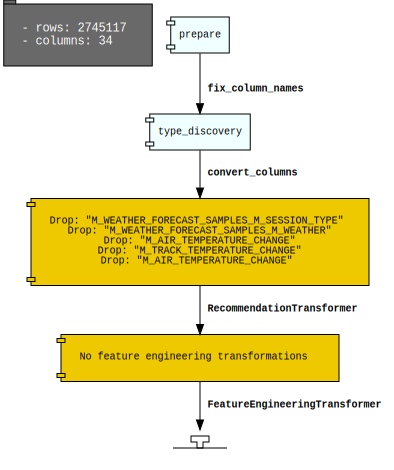

In [36]:
dataSetFactoryFinal = DatasetFactory.open(Final_data_frame, target="M_WEATHER")
dataset_transformed_final = dataSetFactoryFinal.auto_transform()
dataset_transformed_final.visualize_transforms()

In [38]:
train, test = dataSetFactoryFinal.train_test_split(test_size=0.2)

# ADS and AutoML

In [39]:
# Now, let's see how well AutoML can perform the same task.
# AutoML will evaluate several algorithms in combination with different values for their 
# hyperparameters.
# Note the time parameter of 160 seconds, this means we allow AutoML this amount of time to find the best solution.

from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
ml_engine = OracleAutoMLProvider(n_jobs = -1) # n_jobs = -1 means that we are not going to limit the resources and let the AutoML to do this for us and take as much as possible
automl = AutoML(train, provider=ml_engine)
automl_model1, baseline = automl.train(time_budget=160, random_state=42)

       'M_BRAKING_ASSIST', 'M_SESSION_LINK_IDENTIFIER', 'M_PIT_RELEASE_ASSIST',
       'M_TRACK_TEMPERATURE', 'M_TRACK_LENGTH', 'M_GAME_PAUSED',
       'M_FORECAST_ACCURACY', 'M_NUM_WEATHER_FORECAST_SAMPLES', 'M_ERSASSIST',
       'M_FORMULA', 'M_PIT_ASSIST', 'M_GEARBOX_ASSIST', 'M_SESSION_TYPE',
       'M_SPECTATOR_CAR_INDEX', 'M_PIT_STOP_WINDOW_LATEST_LAP',
       'M_DYNAMIC_RACING_LINE_TYPE', 'M_SESSION_DURATION',
       'M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE', 'M_TIME_OFFSET',
       'M_WEATHER_FORECAST_SAMPLES_M_WEATHER',
       'M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE',
       'M_TRACK_TEMPERATURE_CHANGE',
       'M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE',
       'M_AIR_TEMPERATURE_CHANGE', 'M_RAIN_PERCENTAGE', 'M_AI_DIFFICULTY',
       'M_PIT_SPEED_LIMIT', 'M_NETWORK_GAME', 'M_TOTAL_LAPS',
       'M_STEERING_ASSIST', 'M_IS_SPECTATING', 'M_DYNAMIC_RACING_LINE',
       'M_DRSASSIST', 'M_NUM_MARSHAL_ZONES'],
      dtype='object')
ERROR:Unfortunately, there were no tr

In [40]:
automl.print_trials(max_rows=10, sort_column='Mean Validation Score')

Algorithm,#Samples,#Features,Mean Validation Score,Hyperparameters,CPU Time,Memory Usage (GB)
RandomForestClassifier_AS,1756874,37,-0.0018,"{'n_estimators': 100, 'class_weight': 'balanced', 'max_features': 0.777777778, 'min_samples_leaf': 0.000625, 'min_samples_split': 0.00125}",33.7094,2.9697e-02
LGBMClassifier_AS,1756874,37,-0.0018,"{'boosting_type': 'gbdt', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_weight': 0.001, 'n_estimators': 100, 'num_leaves': 31, 'reg_alpha': 0, 'reg_lambda': 1, 'class_weight': 'balanced'}",10.5318,1.4830e-01
DecisionTreeClassifier_AS,1756874,37,-0.0021,"{'class_weight': None, 'max_features': 1.0, 'min_samples_leaf': 0.000625, 'min_samples_split': 0.00125}",0.9453,6.1148e-01
ExtraTreesClassifier_AS,1756874,37,-0.0049,"{'n_estimators': 100, 'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 0.777777778, 'min_samples_leaf': 0.000625, 'min_samples_split': 0.00125}",29.3446,5.7560e-02
XGBClassifier_AS,1756874,37,-0.0054,"{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1}",44.3426,1.0722e-01
LogisticRegression_AS,1756874,37,-0.0626,"{'C': 1.0, 'class_weight': 'balanced', 'solver': 'liblinear'}",26.6323,1.2848e-01
GaussianNB_AS,1756874,37,-6.3571,{},0.3911,7.6294e-06


### Visualization and Evaluation

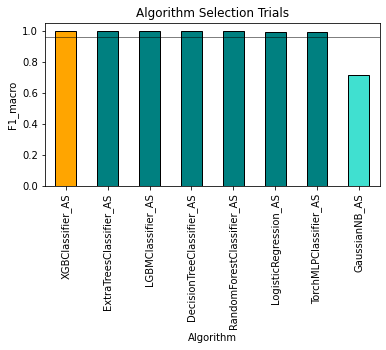

<Figure size 432x288 with 0 Axes>

In [51]:
fig1 =automl.visualize_algorithm_selection_trials()
import matplotlib.pyplot as plt
plt.savefig('fig1')

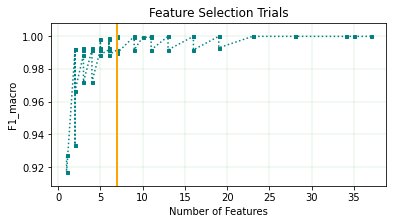

In [48]:
fig2 = automl.visualize_feature_selection_trials()

In [ ]:
import matplotlib.pyplot as plt
plt.savefig('fig2')

In [42]:
automl_model2, _ = automl.train(model_list=['RandomForestClassifier'])

Training Dataset size,"(2196093, 37)"
Validation Dataset size,None
CV,None
Target variable,M_WEATHER
Optimization Metric,neg_log_loss
Initial number of Features,37
Selected number of Features,9
Selected Features,"Index(['M_SESSION_UID', 'M_FRAME_IDENTIFIER', 'M_SESSION_LINK_IDENTIFIER', 'M_TRACK_TEMPERATURE', 'M_TRACK_LENGTH', 'M_NUM_WEATHER_FORECAST_SAMPLES', 'M_SESSION_TYPE', 'M_PIT_STOP_WINDOW_LATEST_LAP', 'M_SESSION_DURATION'], dtype='object')"
Selected Algorithm,RandomForestClassifier
End-to-end Elapsed Time (seconds),6595.3337
Selected Hyperparameters,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': None, 'max_features': 0.1111111111111111, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1.544680660443663e-06, 'min_samples_split': 3.089361320887326e-06, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 5, 'n_jobs': 4, 'oob_score': False, 'random_state': 7, 'verbose': 0, 'warm_start': False}"


Rank based on Performance,Algorithm,#Samples,#Features,Mean Validation Score,Hyperparameters,CPU Time,Memory Usage
2,RandomForestClassifier_HT,647383,9,-2.1094e-15,"{'class_weight': None, 'max_features': 0.7777866668888889, 'min_samples_leaf': 1.544680660443663e-06, 'min_samples_split': 3.089361320887326e-06, 'n_estimators': 5}",4.4085,0.0434
3,RandomForestClassifier_HT,647383,9,-2.1094e-15,"{'class_weight': 'balanced_subsample', 'max_features': 0.1111111111111111, 'min_samples_leaf': 1.544680660443663e-06, 'min_samples_split': 3.089361320887326e-06, 'n_estimators': 6}",4.2161,0.0481
4,RandomForestClassifier_HT,647383,9,-2.1094e-15,"{'class_weight': None, 'max_features': 0.5773618158486156, 'min_samples_leaf': 1.544680660443663e-06, 'min_samples_split': 3.089361320887326e-06, 'n_estimators': 5}",3.4905,0.0434
5,RandomForestClassifier_HT,647383,9,-2.1094e-15,"{'class_weight': None, 'max_features': 0.5773707047375044, 'min_samples_leaf': 1.544680660443663e-06, 'min_samples_split': 3.089361320887326e-06, 'n_estimators': 5}",3.5289,0.0434
6,RandomForestClassifier_HT,647383,9,-2.1094e-15,"{'class_weight': None, 'max_features': 0.777777778, 'min_samples_leaf': 1.544680660443663e-06, 'min_samples_split': 3.089361320887326e-06, 'n_estimators': 5}",4.3340,0.0434
...,...,...,...,...,...,...,...
142,RandomForestClassifier_AdaBoostClassifier_FS,647383,3,-1.5874e-01,"{'n_estimators': 100, 'class_weight': 'balanced', 'max_features': 0.777777778, 'min_samples_leaf': 0.000625, 'min_samples_split': 0.00125}",36.3696,0.0658
143,RandomForestClassifier_HT,647383,9,-1.7126e-01,"{'class_weight': None, 'max_features': 0.1111111111111111, 'min_samples_leaf': 1.544680660443663e-06, 'min_samples_split': 0.06014913107074945, 'n_estimators': 5}",2.0049,0.0434
144,RandomForestClassifier_HT,647383,9,-1.7126e-01,"{'class_weight': None, 'max_features': 0.1111111111111111, 'min_samples_leaf': 1.544680660443663e-06, 'min_samples_split': 0.06015913103985584, 'n_estimators': 5}",2.1113,0.0000
145,RandomForestClassifier_AdaBoostClassifier_FS,647383,2,-1.8167e-01,"{'n_estimators': 100, 'class_weight': 'balanced', 'max_features': 0.777777778, 'min_samples_leaf': 0.000625, 'min_samples_split': 0.00125}",23.6297,0.0534


In [43]:
automl_model3, _ = automl.train(score_metric='f1_macro')

[18:39:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[18:55:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Training Dataset size,"(2196093, 37)"
Validation Dataset size,None
CV,None
Target variable,M_WEATHER
Optimization Metric,f1_macro
Initial number of Features,37
Selected number of Features,7
Selected Features,"Index(['M_SESSION_UID', 'M_FRAME_IDENTIFIER', 'M_PLAYER_CAR_INDEX', 'M_SESSION_LINK_IDENTIFIER', 'M_TRACK_TEMPERATURE', 'M_TRACK_LENGTH', 'M_NUM_MARSHAL_ZONES'], dtype='object')"
Selected Algorithm,XGBClassifier
End-to-end Elapsed Time (seconds),2745.2891
Selected Hyperparameters,"{'objective': 'multi:softprob', 'use_label_encoder': True, 'base_score': 0.5, 'booster': 'dart', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'enable_categorical': False, 'gamma': 0, 'gpu_id': -1, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 4, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 7, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': None, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}"


Rank based on Performance,Algorithm,#Samples,#Features,Mean Validation Score,Hyperparameters,CPU Time,Memory Usage
2,XGBClassifier_ADS,3000,37,1.0000,"{'objective': 'multi:softprob', 'use_label_encoder': True, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'enable_categorical': False, 'gamma': 0, 'gpu_id': -1, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 4, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 7, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': None, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}",0.0244,1.1902e-03
3,XGBClassifier_ADS,9393,37,1.0000,"{'objective': 'multi:softprob', 'use_label_encoder': True, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'enable_categorical': False, 'gamma': 0, 'gpu_id': -1, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 4, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 7, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': None, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}",0.0379,1.1902e-03
4,XGBClassifier_AS,1756874,37,1.0000,"{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1}",44.8743,8.6636e-02
5,XGBClassifier_HT,51198,7,1.0000,"{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1}",16.0609,0.0000e+00
6,XGBClassifier_HT,51198,7,1.0000,"{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 275, 'reg_alpha': 0, 'reg_lambda': 1}",22.3556,0.0000e+00
...,...,...,...,...,...,...,...
144,XGBClassifier_HT,51198,7,0.9392,"{'booster': 'dart', 'learning_rate': 0.0001, 'max_depth': 2, 'min_child_weight': 0, 'n_estimators': 50, 'reg_alpha': 0.0, 'reg_lambda': 0.0}",16.8380,0.0000e+00
145,XGBClassifier_MIClassification_FS,51198,2,0.9337,"{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1}",8.8340,0.0000e+00
146,XGBClassifier_MIClassification_FS,51198,1,0.9273,"{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1}",6.0464,0.0000e+00
147,XGBClassifier_ANOVAF_FS,51198,1,0.9169,"{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1}",6.0031,0.0000e+00


In [52]:
automl_model4, _ = automl.train(score_metric='accuracy')

[19:50:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[20:06:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Training Dataset size,"(2196093, 37)"
Validation Dataset size,None
CV,None
Target variable,M_WEATHER
Optimization Metric,accuracy
Initial number of Features,37
Selected number of Features,7
Selected Features,"Index(['M_SESSION_UID', 'M_FRAME_IDENTIFIER', 'M_PLAYER_CAR_INDEX', 'M_SESSION_LINK_IDENTIFIER', 'M_TRACK_TEMPERATURE', 'M_TRACK_LENGTH', 'M_NUM_MARSHAL_ZONES'], dtype='object')"
Selected Algorithm,XGBClassifier
End-to-end Elapsed Time (seconds),2742.7593
Selected Hyperparameters,"{'objective': 'multi:softprob', 'use_label_encoder': True, 'base_score': 0.5, 'booster': 'dart', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'enable_categorical': False, 'gamma': 0, 'gpu_id': -1, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 4, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 7, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': None, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}"


Rank based on Performance,Algorithm,#Samples,#Features,Mean Validation Score,Hyperparameters,CPU Time,Memory Usage
2,XGBClassifier_ADS,3000,37,1.0000,"{'objective': 'multi:softprob', 'use_label_encoder': True, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'enable_categorical': False, 'gamma': 0, 'gpu_id': -1, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 4, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 7, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': None, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}",0.0226,0.0000
3,XGBClassifier_ADS,9393,37,1.0000,"{'objective': 'multi:softprob', 'use_label_encoder': True, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'enable_categorical': False, 'gamma': 0, 'gpu_id': -1, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 4, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 7, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': None, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}",0.0392,0.0000
4,XGBClassifier_HT,51198,7,1.0000,"{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1}",15.4911,0.0000
5,XGBClassifier_HT,51198,7,1.0000,"{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 275, 'reg_alpha': 0, 'reg_lambda': 1}",23.3805,0.0000
6,XGBClassifier_HT,51198,7,1.0000,"{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 5.623413251903491}",7.7344,0.0000
...,...,...,...,...,...,...,...
144,XGBClassifier_HT,51198,7,0.9400,"{'booster': 'dart', 'learning_rate': 0.0001, 'max_depth': 2, 'min_child_weight': 0, 'n_estimators': 50, 'reg_alpha': 0.0, 'reg_lambda': 0.0}",14.6204,0.0000
145,XGBClassifier_MIClassification_FS,51198,2,0.9344,"{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1}",6.7040,0.0000
146,XGBClassifier_MIClassification_FS,51198,1,0.9279,"{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1}",5.5445,0.0000
147,XGBClassifier_ANOVAF_FS,51198,1,0.9177,"{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1}",6.7135,0.0000


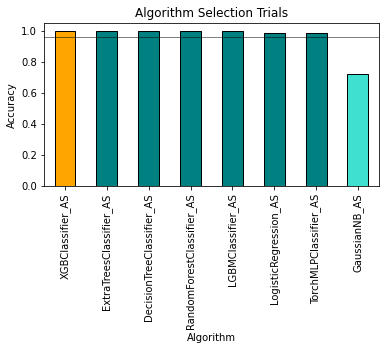

<Figure size 432x288 with 0 Axes>

In [53]:
fig3 =automl.visualize_algorithm_selection_trials()
import matplotlib.pyplot as plt
plt.savefig('fig3.png')

loop1:   0%|          | 0/4 [00:00<?, ?it/s]

loop1:   0%|          | 0/7 [00:00<?, ?it/s]

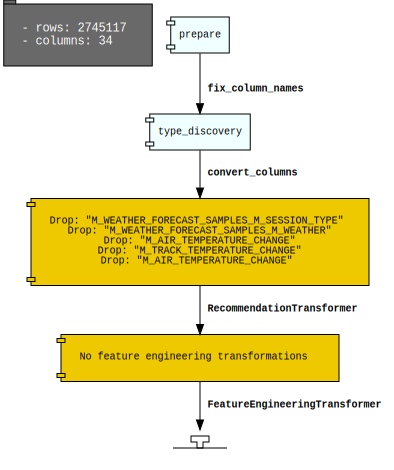

In [55]:
dataSetFactory_Rain = DatasetFactory.open(Final_data_frame, target="M_RAIN_PERCENTAGE")
dataset_transformed_Rain = dataSetFactoryFinal.auto_transform()
dataset_transformed_Rain.visualize_transforms()

In [56]:
train, test = dataset_transformed_Rain.train_test_split(test_size=0.2)

In [57]:
# Now, let's see how well AutoML can perform the same task.
# AutoML will evaluate several algorithms in combination with different values for their 
# hyperparameters.
# Note the time parameter of 160 seconds, this means we allow AutoML this amount of time to find the best solution.

from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
ml_engine = OracleAutoMLProvider(n_jobs = -1) # n_jobs = -1 means that we are not going to limit the resources and let the AutoML to do this for us and take as much as possible
automl = AutoML(train, provider=ml_engine)
automl_model1, baseline = automl.train(time_budget=160, random_state=42)

       'M_BRAKING_ASSIST', 'M_SESSION_LINK_IDENTIFIER', 'M_PIT_RELEASE_ASSIST',
       'M_TRACK_TEMPERATURE', 'M_TRACK_LENGTH', 'M_GAME_PAUSED',
       'M_FORECAST_ACCURACY', 'M_NUM_WEATHER_FORECAST_SAMPLES', 'M_ERSASSIST',
       'M_FORMULA', 'M_PIT_ASSIST', 'M_GEARBOX_ASSIST', 'M_SESSION_TYPE',
       'M_SPECTATOR_CAR_INDEX', 'M_PIT_STOP_WINDOW_LATEST_LAP',
       'M_DYNAMIC_RACING_LINE_TYPE', 'M_SESSION_DURATION', 'M_TIME_OFFSET',
       'M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE',
       'M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE', 'M_RAIN_PERCENTAGE',
       'M_AI_DIFFICULTY', 'M_PIT_SPEED_LIMIT', 'M_NETWORK_GAME',
       'M_TOTAL_LAPS', 'M_STEERING_ASSIST', 'M_IS_SPECTATING',
       'M_DYNAMIC_RACING_LINE', 'M_DRSASSIST', 'M_NUM_MARSHAL_ZONES'],
      dtype='object')
ERROR:Unfortunately, there were no trials found, so we cannot visualize it.


In [58]:
automl_model4, _ = automl.train(score_metric='accuracy')

[21:31:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[21:46:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Training Dataset size,"(2196093, 33)"
Validation Dataset size,None
CV,None
Target variable,M_WEATHER
Optimization Metric,accuracy
Initial number of Features,33
Selected number of Features,7
Selected Features,"Index(['M_SESSION_UID', 'M_FRAME_IDENTIFIER', 'M_PLAYER_CAR_INDEX', 'M_SESSION_LINK_IDENTIFIER', 'M_TRACK_TEMPERATURE', 'M_TRACK_LENGTH', 'M_NUM_MARSHAL_ZONES'], dtype='object')"
Selected Algorithm,XGBClassifier
End-to-end Elapsed Time (seconds),2691.0106
Selected Hyperparameters,"{'objective': 'multi:softprob', 'use_label_encoder': True, 'base_score': 0.5, 'booster': 'dart', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'enable_categorical': False, 'gamma': 0, 'gpu_id': -1, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 4, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 7, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': None, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}"


Rank based on Performance,Algorithm,#Samples,#Features,Mean Validation Score,Hyperparameters,CPU Time,Memory Usage
2,XGBClassifier_ADS,3000,33,1.0000,"{'objective': 'multi:softprob', 'use_label_encoder': True, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'enable_categorical': False, 'gamma': 0, 'gpu_id': -1, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 4, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 7, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': None, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}",0.0226,0.0
3,XGBClassifier_ADS,9393,33,1.0000,"{'objective': 'multi:softprob', 'use_label_encoder': True, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'enable_categorical': False, 'gamma': 0, 'gpu_id': -1, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 4, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 7, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': None, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}",0.0370,0.0
4,XGBClassifier_HT,51198,7,1.0000,"{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1}",10.6554,0.0
5,XGBClassifier_HT,51198,7,1.0000,"{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 276, 'reg_alpha': 0, 'reg_lambda': 1}",22.9144,0.0
6,XGBClassifier_HT,51198,7,1.0000,"{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1}",13.5170,0.0
...,...,...,...,...,...,...,...
137,XGBClassifier_HT,51198,7,0.9400,"{'booster': 'dart', 'learning_rate': 0.0001, 'max_depth': 2, 'min_child_weight': 0, 'n_estimators': 50, 'reg_alpha': 0.0, 'reg_lambda': 0.0}",14.1886,0.0
138,XGBClassifier_MIClassification_FS,51198,2,0.9344,"{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1}",6.5754,0.0
139,XGBClassifier_MIClassification_FS,51198,1,0.9279,"{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1}",6.8171,0.0
140,XGBClassifier_ANOVAF_FS,51198,1,0.9177,"{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1}",5.3285,0.0


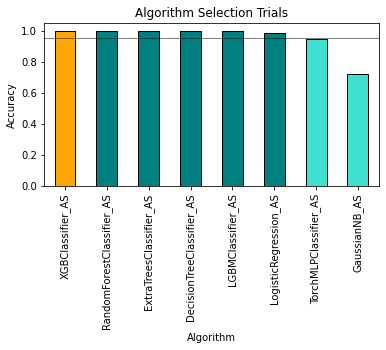

<Figure size 432x288 with 0 Axes>

In [59]:
fig4 =automl.visualize_algorithm_selection_trials()
import matplotlib.pyplot as plt
plt.savefig('fig4.png')

### Import Model to pickle

In [70]:
import pickle
 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(automl_model4)
pickle.dump(automl_model4, open('model.pkl', 'wb'))